### 1. Customer Data Cleaning and Analysis

Work with a raw customer dataset that contains missing values, inconsistent formatting, and incorrect data. Clean the data by handling missing values, standardizing formats, and removing duplicates. Use Pandas for data manipulation and create a clean dataset for further analysis.

#### Understand the Data

In [4]:
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [6]:
# Path to the zip file
zip_file_path = 'Shopping_trends.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all the files in the zip archive
    zip_ref.printdir()
    
    # Extract the CSV file from the zip archive
    # You can adjust the file name inside the zip if necessary
    csv_file_name = 'shopping_trends.csv'
    
    # Read the CSV file directly from the zip archive
    with zip_ref.open(csv_file_name) as csv_file:
        raw_data = pd.read_csv(csv_file)

File Name                                             Modified             Size
shopping_trends.csv                            2023-11-14 06:15:20       453248


In [7]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(raw_data.head())

First few rows of the dataset:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shippin

In [8]:
# Display basic information about the dataset
print("\nDataset Info:")
print(raw_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object

In [9]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(raw_data.describe())


Summary Statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [10]:
# Display the column names
print("\nColumn Names:")
print(raw_data.columns)


Column Names:
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [11]:
# Display the number of rows and columns in the dataset
print("\nDataset Shape:")
print(raw_data.shape)


Dataset Shape:
(3900, 19)


#### Data Cleaning

In [13]:
# Check for missing values
print("\nMissing values before cleaning:")
missing_values = raw_data.isnull().sum()
print(missing_values[missing_values > 0])

# Handle missing values in 'Frequency of Purchases' (non-numeric values)
# Identify and replace non-numeric values with NaN
non_numeric_values = raw_data[~raw_data['Frequency of Purchases'].apply(lambda x: isinstance(x, (int, float)))]
print("\nNon-numeric values in 'Frequency of Purchases':")
print(non_numeric_values)

# Convert non-numeric values to NaN and then fill with the mean
raw_data['Frequency of Purchases'] = pd.to_numeric(raw_data['Frequency of Purchases'], errors='coerce')
raw_data['Frequency of Purchases'] = raw_data['Frequency of Purchases'].fillna(raw_data['Frequency of Purchases'].mean())

# Outlier detection and handling using capping method (for Age and Purchase Amount)
numerical_columns = ['Age', 'Purchase Amount (USD)']
for col in numerical_columns:
    lower_bound = raw_data[col].quantile(0.01)
    upper_bound = raw_data[col].quantile(0.99)
    raw_data[col] = raw_data[col].clip(lower_bound, upper_bound)

# Correct spelling mistakes and standardize formats in categorical columns
# Convert to lowercase for consistency
categorical_columns = ['Gender', 'Item Purchased', 'Location', 'Size', 'Color', 'Payment Method']
for col in categorical_columns:
    raw_data[col] = raw_data[col].str.lower()

# Correct common spelling mistakes
raw_data['Gender'] = raw_data['Gender'].replace({'male': 'm', 'female': 'f'})

# Standardize the 'Promo Code Used' and 'Discount Applied' columns to 'Yes'/'No'
raw_data['Promo Code Used'] = raw_data['Promo Code Used'].replace({'yes': 'Yes', 'no': 'No'})
raw_data['Discount Applied'] = raw_data['Discount Applied'].replace({'yes': 'Yes', 'no': 'No'})

# Standardize the 'Shipping Type' column to a consistent format
raw_data['Shipping Type'] = raw_data['Shipping Type'].str.lower().replace({'express': 'Express', 'standard': 'Standard'})

# Handle duplicates
# Check for duplicates based on key fields
duplicates = raw_data[raw_data.duplicated(subset=['Customer ID', 'Item Purchased', 'Purchase Amount (USD)'])]
print("\nPotential duplicates before removal:")
print(duplicates)

# Remove duplicate rows
raw_data = raw_data.drop_duplicates()

# Final data checks
print("\nMissing values after cleaning:")
print(raw_data.isnull().sum())

# Final summary statistics after data cleaning
print("\nSummary statistics after data cleaning:")
print(raw_data.describe())

# Check unique values in categorical columns after cleaning
for col in raw_data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{col}':")
    print(raw_data[col].unique())


Missing values before cleaning:
Frequency of Purchases    3900
dtype: int64

Non-numeric values in 'Frequency of Purchases':
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
Index: []

Potential duplicates before removal:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
Index: []

Missing values after cleaning:
Customer ID                    0
Age                            0
Gender                         0
Item Purchased                 0
Category                       0
Purchase Am

In [14]:
# Save cleaned dataset
cleaned_file_name = 'cleaned_shopping_trends.csv'
raw_data.to_csv(cleaned_file_name, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_name}")


Cleaned dataset saved to cleaned_shopping_trends.csv


#### Data Analysis

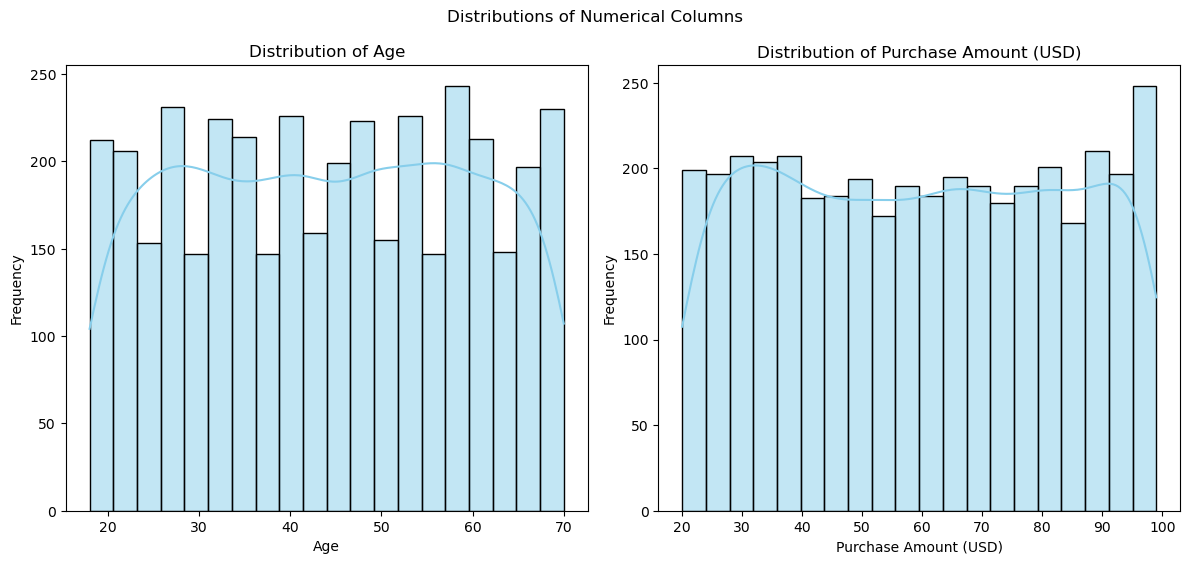

In [15]:
# Improved histogram with individual plots and better labeling
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(raw_data[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle("Distributions of Numerical Columns", y=1.02)
plt.show()

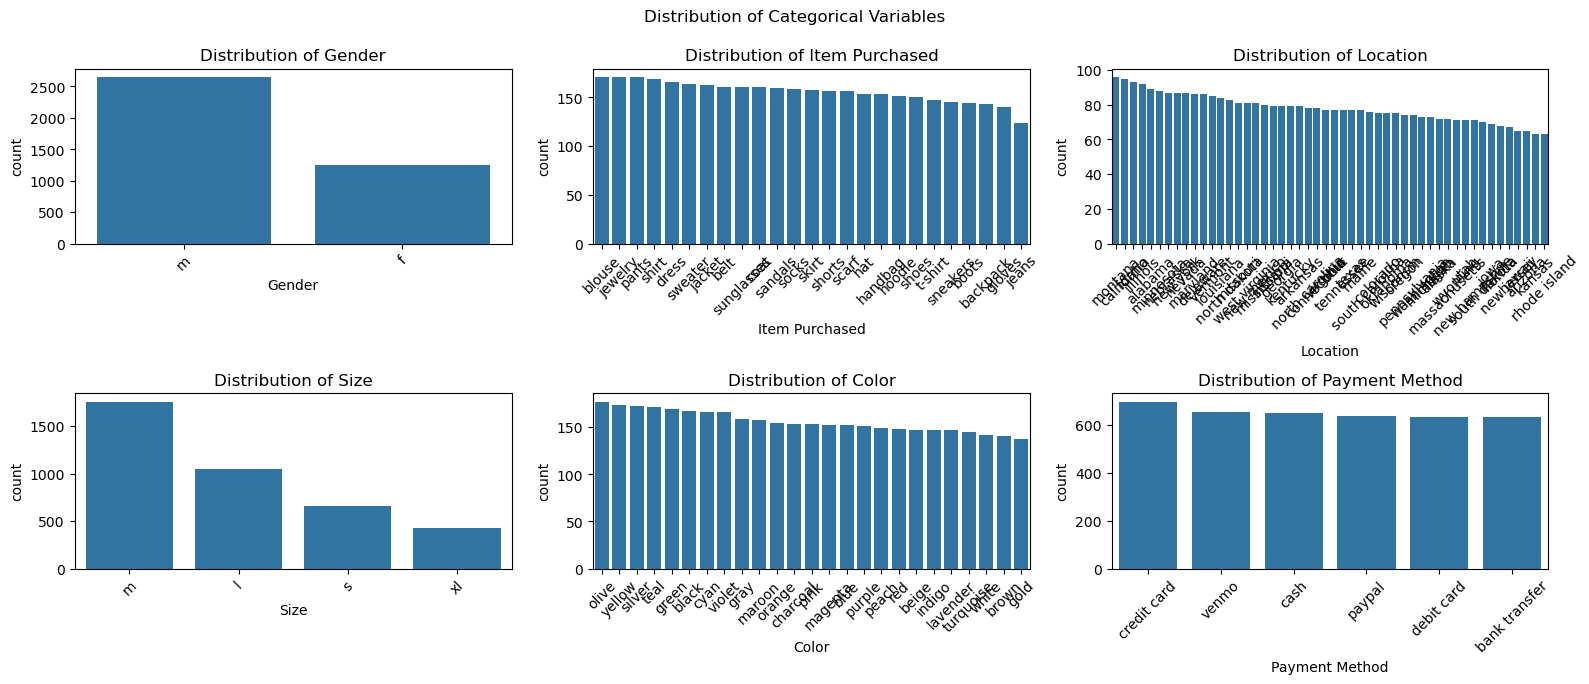

In [23]:
# Improved count plot visualization for categorical columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=raw_data, x=col, order=raw_data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("Distribution of Categorical Variables", y=1.02)
plt.show()

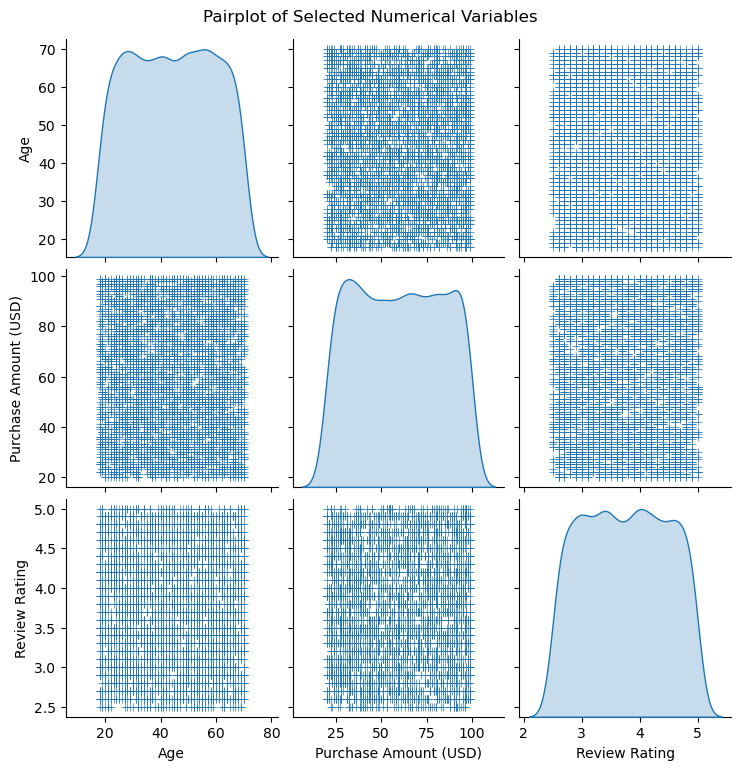

In [18]:
# Pairplot of selected numerical variables
selected_numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating']
sns.pairplot(raw_data[selected_numerical_columns], diag_kind='kde', markers='+')
plt.suptitle("Pairplot of Selected Numerical Variables", y=1.02)
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\2520040092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_items.values, y=top_10_items.index, palette='viridis')


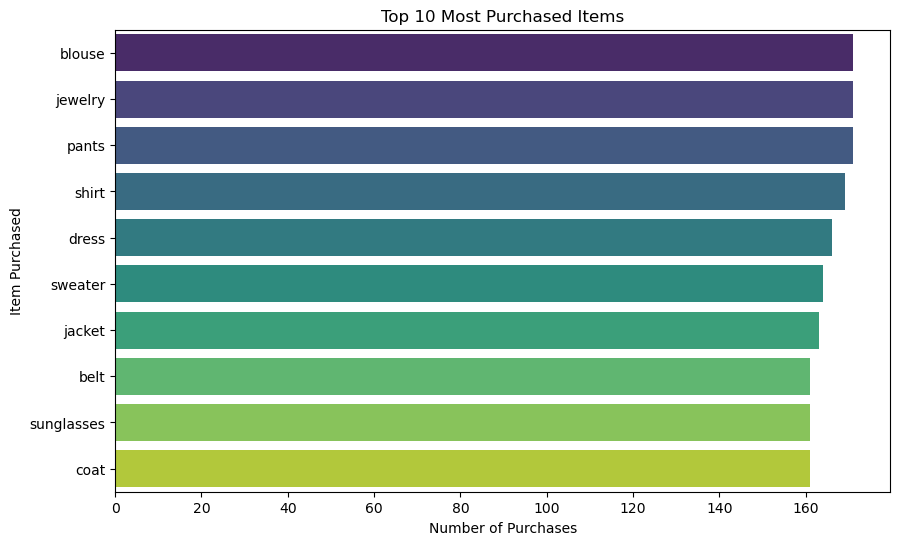

In [24]:
# Frequency distribution of items purchased
item_counts = raw_data['Item Purchased'].value_counts()

# Now plot the top 10 most purchased items
plt.figure(figsize=(10, 6))
top_10_items = item_counts.head(10)
sns.barplot(x=top_10_items.values, y=top_10_items.index, palette='viridis')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Purchased')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\2584362964.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_purchase.values, y=top_avg_purchase.index, palette='viridis')


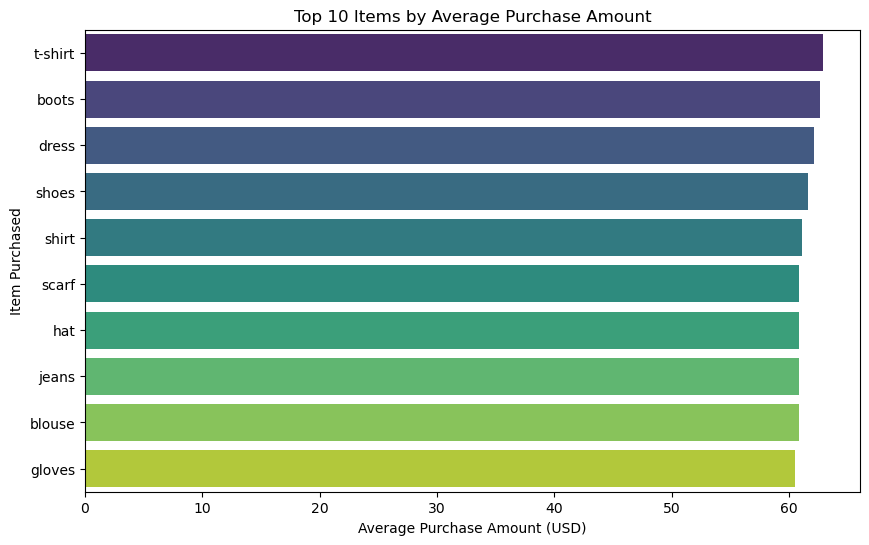

In [25]:
# Analysis of the average purchase amount for each item
avg_purchase_amount = raw_data.groupby('Item Purchased')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Now plot the top 10 items by average purchase amount
plt.figure(figsize=(10, 6))
top_avg_purchase = avg_purchase_amount.head(10)
sns.barplot(x=top_avg_purchase.values, y=top_avg_purchase.index, palette='viridis')
plt.title('Top 10 Items by Average Purchase Amount')
plt.xlabel('Average Purchase Amount (USD)')
plt.ylabel('Item Purchased')
plt.show()

### Analysis

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\3558923152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data, x='Gender', y='Purchase Amount (USD)', palette='Set2')


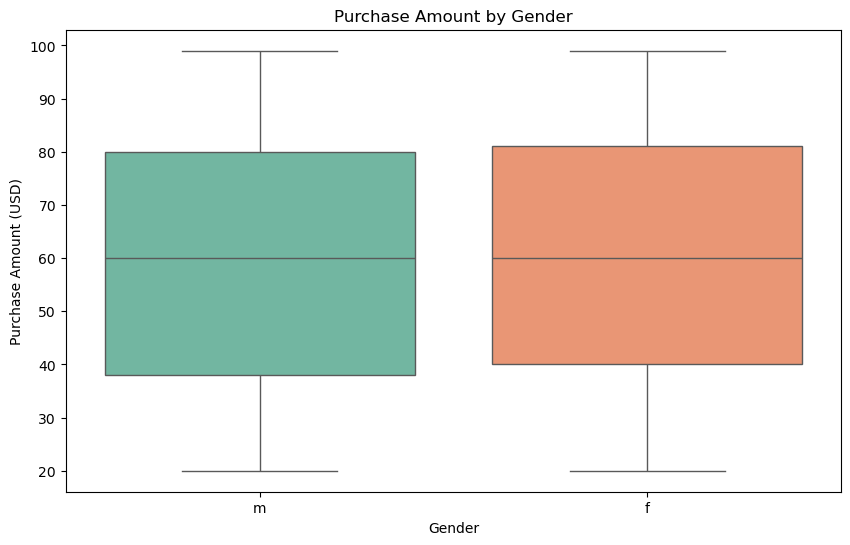

In [27]:
# Gender differences in purchasing habits (average purchase amount)
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_data, x='Gender', y='Purchase Amount (USD)', palette='Set2')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

Average age of customers by category:
Category
Accessories    44.224194
Clothing       43.782959
Footwear       44.442404
Outerwear      44.311728
Name: Age, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_12036\289563398.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_age_by_category.values, y=avg_age_by_category.index, palette='coolwarm')


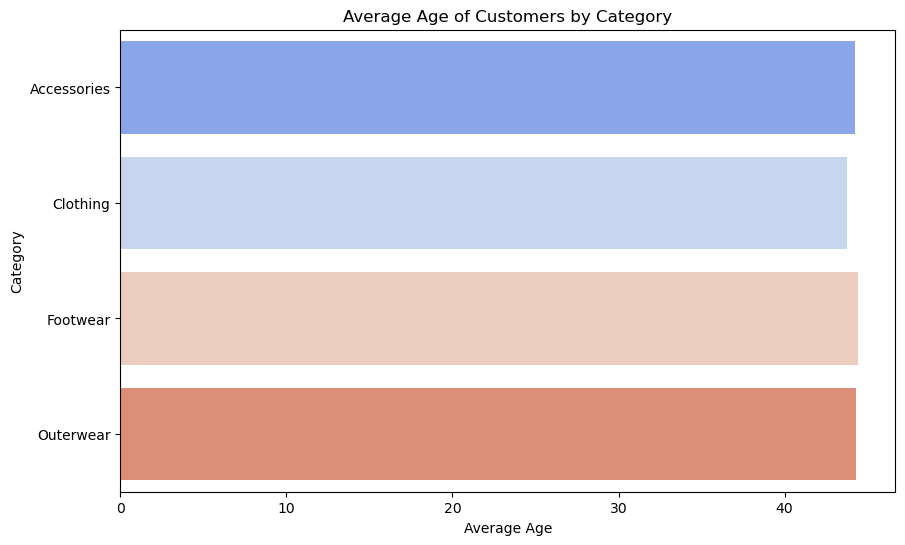

In [28]:
# Average age of customers by category
avg_age_by_category = raw_data.groupby('Category')['Age'].mean()
print("Average age of customers by category:")
print(avg_age_by_category)

# Plot average age by category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_age_by_category.values, y=avg_age_by_category.index, palette='coolwarm')
plt.title('Average Age of Customers by Category')
plt.xlabel('Average Age')
plt.ylabel('Category')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\1901258173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.values, y=color_counts.index, palette='viridis')


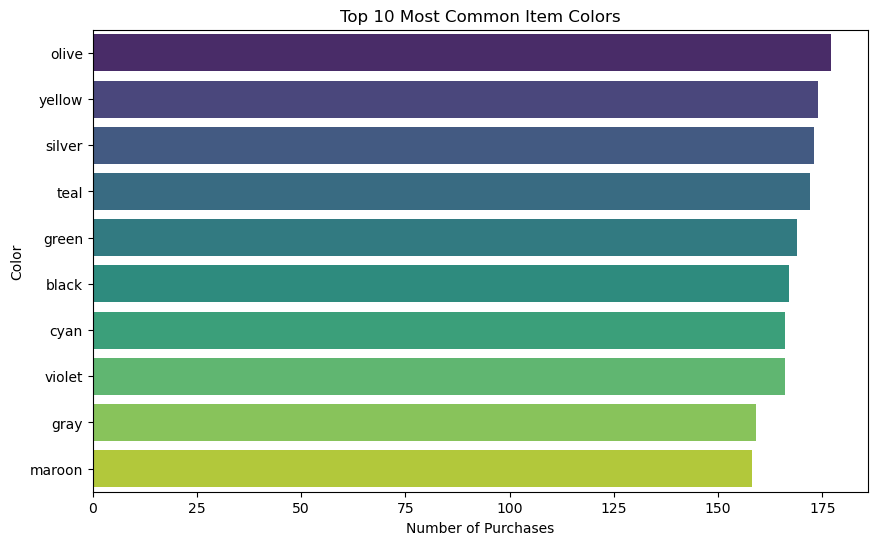

In [32]:
# Most common colors of items purchased
color_counts = raw_data['Color'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=color_counts.values, y=color_counts.index, palette='viridis')
plt.title('Top 10 Most Common Item Colors')
plt.xlabel('Number of Purchases')
plt.ylabel('Color')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\2212431540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x='Season', palette='cubehelix')


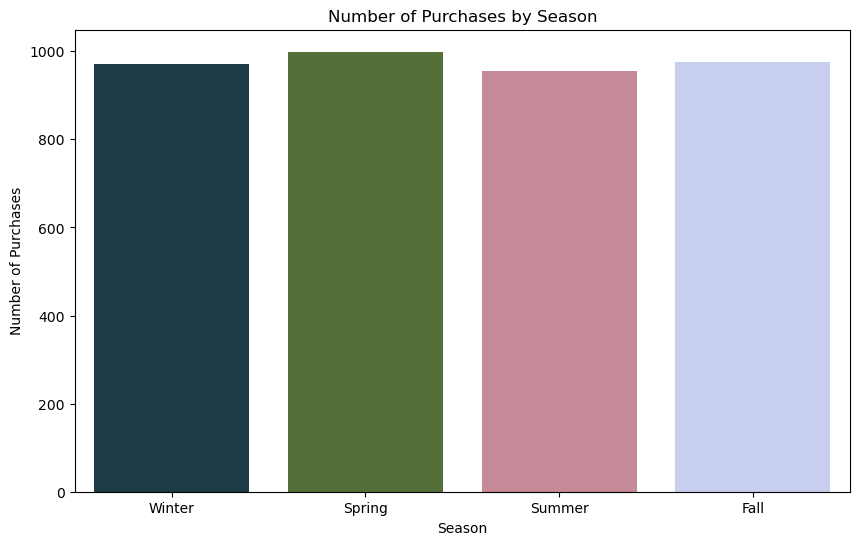

In [33]:
# Number of purchases by season
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_data, x='Season', palette='cubehelix')
plt.title('Number of Purchases by Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\1993133195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_purchase_by_season.index, y=avg_purchase_by_season.values, palette='Spectral')


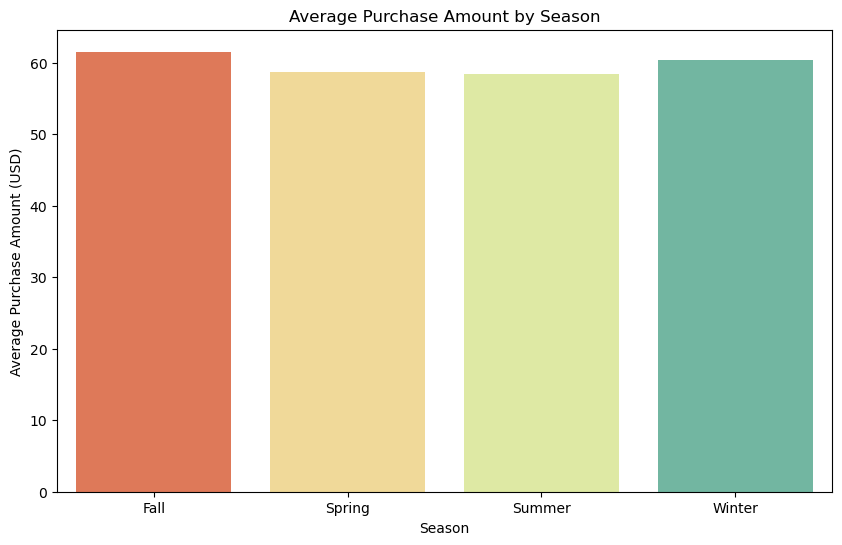

In [34]:
# Average purchase amount by season
avg_purchase_by_season = raw_data.groupby('Season')['Purchase Amount (USD)'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_purchase_by_season.index, y=avg_purchase_by_season.values, palette='Spectral')
plt.title('Average Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

In [35]:
# Most popular items by season
popular_items_by_season = raw_data.groupby(['Season', 'Item Purchased']).size().reset_index(name='Count')
most_popular_by_season = popular_items_by_season.groupby('Season').apply(lambda x: x.nlargest(1, 'Count'))
print("Most popular items by season:")
print(most_popular_by_season)

Most popular items by season:
           Season Item Purchased  Count
Season                                 
Fall   10    Fall         jacket     54
Spring 48  Spring        sweater     52
Summer 63  Summer          pants     50
Winter 97  Winter     sunglasses     52


C:\Users\milto\AppData\Local\Temp\ipykernel_12036\1460238599.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_popular_by_season = popular_items_by_season.groupby('Season').apply(lambda x: x.nlargest(1, 'Count'))


C:\Users\milto\AppData\Local\Temp\ipykernel_12036\3525407377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x='Payment Method', palette='coolwarm')


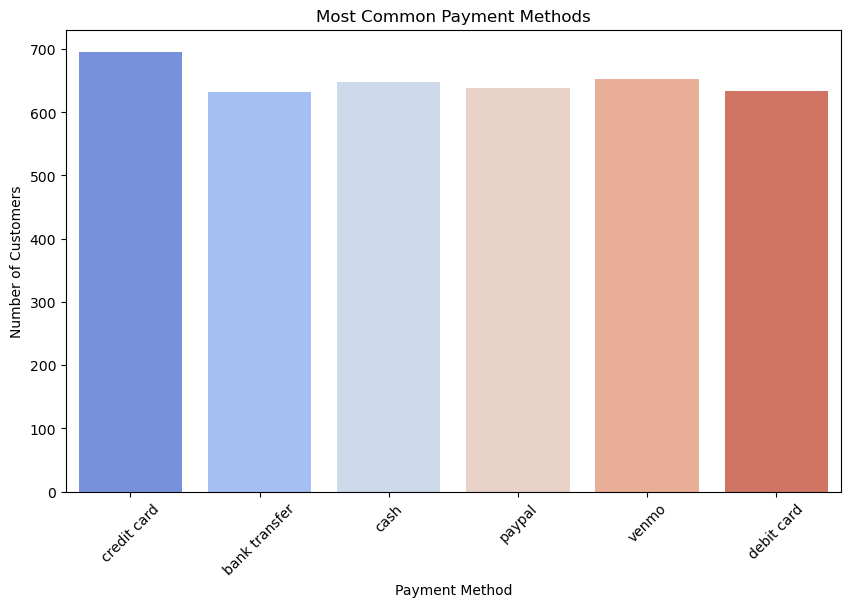

In [36]:
# Most common payment methods
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_data, x='Payment Method', palette='coolwarm')
plt.title('Most Common Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\1084482454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data, x='Subscription Status', y='Purchase Amount (USD)', palette='Set3')


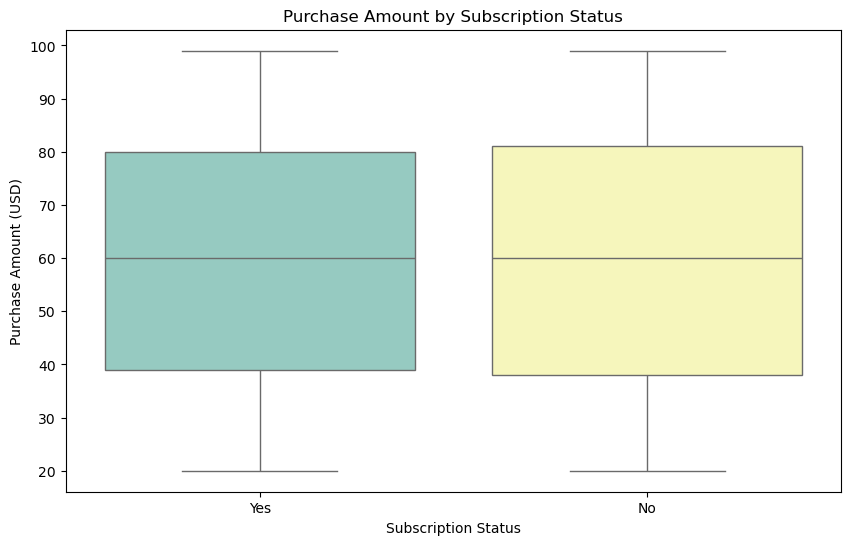

In [37]:
# Subscription status and purchase amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_data, x='Subscription Status', y='Purchase Amount (USD)', palette='Set3')
plt.title('Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\3989509710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x='Discount Applied', palette='pastel')


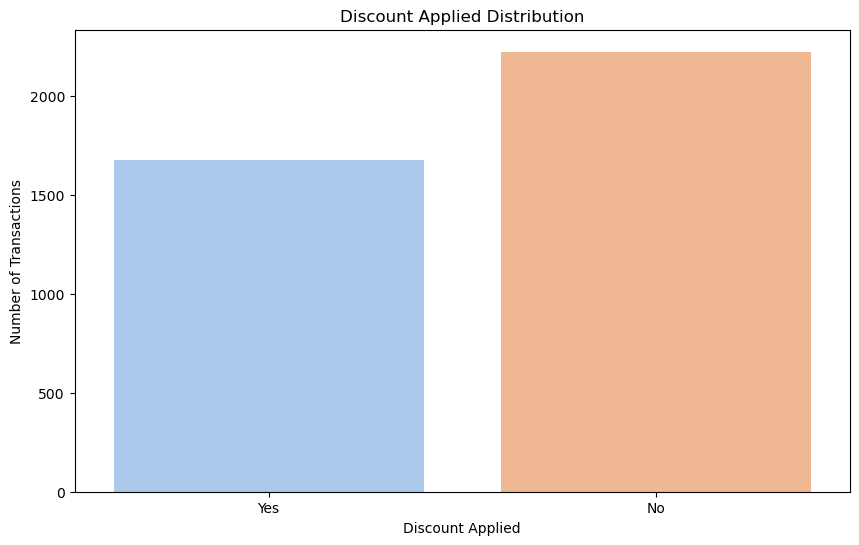

In [38]:
# Discount usage distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_data, x='Discount Applied', palette='pastel')
plt.title('Discount Applied Distribution')
plt.xlabel('Discount Applied')
plt.ylabel('Number of Transactions')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_12036\542392462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data, x='Promo Code Used', y='Purchase Amount (USD)', palette='cool')


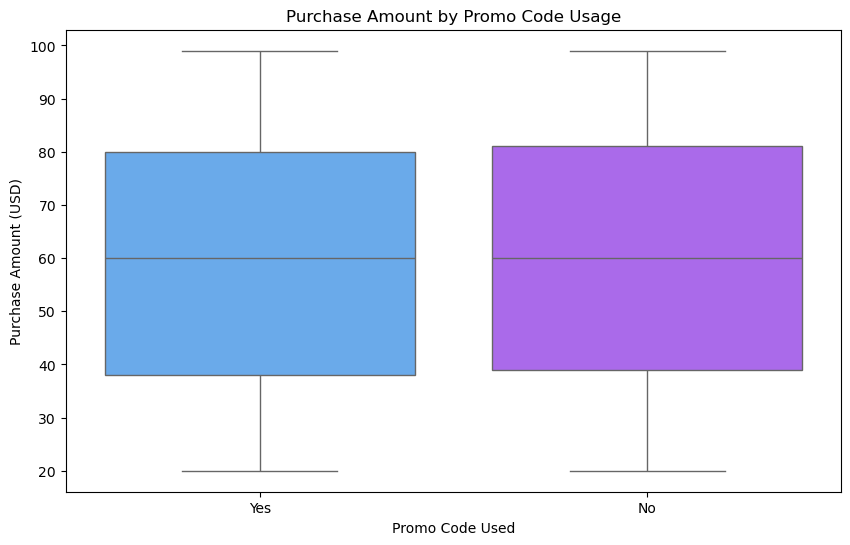

In [39]:
# Promo code usage and purchase amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_data, x='Promo Code Used', y='Purchase Amount (USD)', palette='cool')
plt.title('Purchase Amount by Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show()